## Observations and Insights 

In [15]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#import seaborn as sns


# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
overall_mouse_data_df = pd.merge(study_results, mouse_metadata,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
#mouse_metadata.count()
#study_results.count()
overall_mouse_data_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [12]:
#General Info
#overall_mouse_data_df.dtypes

In [3]:
# Cleaning Data - Checking for overall mouse count
mouse_count_df = overall_mouse_data_df.count()
#mouse_count_df

In [4]:
#Todo:  Find the duplicate mouse id

In [5]:
# Cleaning Data - Dropped the duplicate mouse data.
mouse_data_nodupes_df= overall_mouse_data_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
mouse_data_nodupes_df.count()

Mouse ID              1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
dtype: int64

## Summary Statistics

In [16]:
#Drug Statistics - Finding the Mean, Median, Variance, Standard Deviation and SEM by tumor volume - Version 1

#mouse_data_nodupes_df.groupby('Drug Regimen', as_index = True)["Tumor Volume (mm3)"].describe()
var_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
med_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
std_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
men_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
sem_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

#stats_df
#var_stat
#med_stat
#std_stat
#men_stat
#sem_stat

drug_stat_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
drug_stat_df

,Variance,Median,Mean,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,24.947764,41.557809,40.675741,4.994774,0.329346
Ceftamin,39.290177,51.776157,52.591172,6.268188,0.469821
Infubinol,43.128684,51.820584,52.884795,6.567243,0.492236
Ketapril,68.553577,53.698743,55.235638,8.279709,0.603860
Naftisol,66.173479,52.509285,54.331565,8.134708,0.596466
Placebo,61.168083,52.288934,54.033581,7.821003,0.581331
Propriva,43.138803,50.909965,52.393463,6.568014,0.525862
Ramicane,23.486704,40.673236,40.216745,4.846308,0.320955
Stelasyn,59.450562,52.431737,54.233149,7.710419,0.573111


In [7]:
##Drug Statistics - Finding the Mean, Median, Variance, Standard Deviation and SEM by tumor volume - Version 2
 
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

drug_stat_v2_df = mouse_data_nodupes_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
drug_stat_v2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

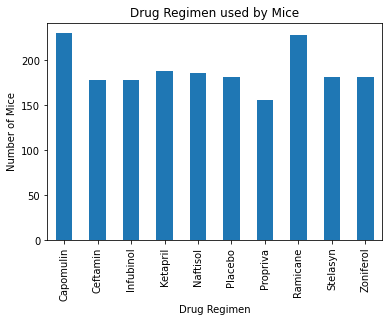

In [8]:
# Bar Chart - Count of Mice Using Drug Regimen - with Panads Dataframe
users_df = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()

#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))

#plt.bar(x_axis, users, color='r', alpha=0.5, align="center"
users_df.plot(kind="bar")
plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
#users2_df= mouse_data_nodupes_df.plot(mouse_data_nodupes_df['Drug Regimen'], kind='bar' , legend=None)
plt.show()

TypeError: object of type 'numpy.int32' has no len()

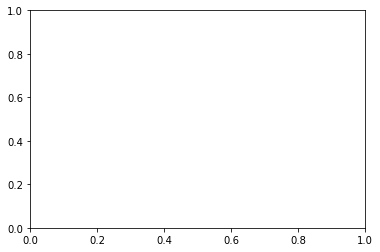

In [53]:
x_data = mouse_data_nodupes_df['Drug Regimen']
data = mouse_data_nodupes_df['Mouse ID'].count()

#x_data
#data
plot.bar(x_data,data); plt.xticks(x,('Drug Regimen'))

TypeError: 'numpy.int32' object is not iterable

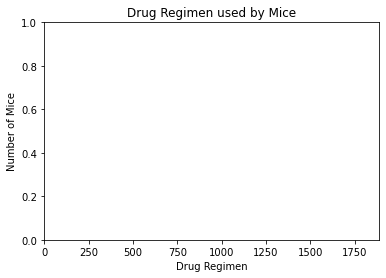

In [21]:
# Bar Chart - Count of Mice Using Drug Regimen - with Matplotlib 
#users_df = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()
#drug_regemin = mouse_data_nodupes_df["Drug Regimen"]
#number_of_mice = mouse_data_nodupes_df["Mouse ID"].count()

#x_axis = np.arange(0, len('drug_regemin'))
#tick_location = []
#for x in x_axis:
 #   tick_location.append(x)


plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(drug_regemin)-.25)
plt.ylim(0, max(number_of_mice) +5)

plt.bar(number_of_mice, x_axis, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_location, drug_regemin)
plt.show()
#Todo:  Passing in the drugs and counts as lists.  


In [ ]:
plt.bar(x_axis, number_of_mice, color='b', alpha = 1, align = 'center')

plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [ ]:
plt.xticks(x_axis, drug_regemin)

#plt.bar(x_axis, drug_regemin)


In [25]:
#Pie Chart - Sex of Mouse in Study - with Pandas Dataframe
gender_of_mice = mouse_data_nodupes_df["Sex"].value_counts()
gender_of_mice_df = pd.DataFrame(gender_of_mice)
gender_of_mice_df['Gender_pct'] = (gender_of_mice_df.Sex / (gender_of_mice_df.Sex.sum()/100)).round(decimals=2)
renamed_genders_of_mice_df = gender_of_mice_df.rename(columns={"Sex":"Total Count", "Gender_pct":"Percentage of Mice"})
def format(x):
    return "{:.2f}%".format(x)
renamed_genders_of_mice_df['Percentage of Mice'] = renamed_genders_of_mice_df['Percentage of Mice'].apply(format)
renamed_genders_of_mice_df


,Total Count,Percentage of Mice
Male,958,50.74%
Female,930,49.26%


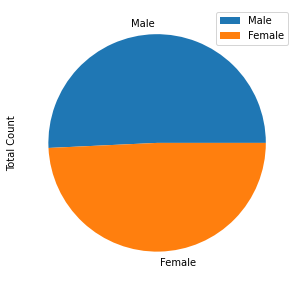

In [32]:
#Pie Chart - Sex of Mouse in Study - with Pandas Dataframe
#renamed_genders_of_mice_df.plot(kind="pie")
plot=renamed_genders_of_mice_df.plot.pie(y='Total Count', figsize=(5, 5))
#plt.show()

C:\Users\Maher\anaconda3\envs\bcs\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


ValueError: 'label' must be of length 'x'

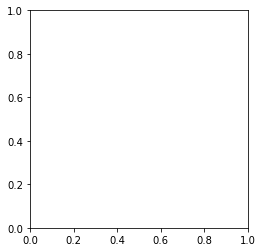

In [56]:
#Pie Chart - Sex of Mouse in Study - with Matplotlib Plot 
user_counts=mouse_data_nodupes_df['Sex'].count()
users = mouse_data_nodupes_df['Sex']
colors = ["orange", "lightskyblue"]
explode = (0.1, 0, 0, 0)
#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))
# Tells matplotlib to seperate the "Humans" section from the others

plt.pie(user_counts, explode=explode, labels=users, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#users = mouse_data_nodupes_df.("Mouse ID").count
#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))

#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

In [ ]:
#Pie Chart - Sex of Mouse in Study - with Matplotlib Plot 
#sex = mouse_data_nodupes_df.groupby(["Sex"])
sex = mouse_data_nodupes_df.groupby(["Sex"])

# The values of each section of the pie chart
sizes = mouse_data_nodupes_df["Sex"].count()

# The colors of each section of the pie chart
colors = ["red", "blue"]
explode = (0.1, 0)  
plt.pie(sex, labels=sizes, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Treatment Impact by Sex")
#plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Do a for loop that looks at the last timepoint of each Mouse ID and retuns the final Tumor Volume (mm3)

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

Reference - Matplotlib - Day 3 - Activity 6 and 7 - For correlation examples
Reference - Matplotlib - Day 3 - Activity 8 for REgression


Regression Line Example from Activity 8:  
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

Correlation - Formula - example from Activity 6:
Correlation Example:
government = who_data.iloc[:,5]
life = who_data.iloc[:,7]
correlation = st.pearsonr(government,life)
plt.scatter(government,life)
plt.xlabel('% Government Expenditure on Health')
plt.ylabel('Male Life Expectancy')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
